# Heart Attack - EDA

### Life Cycle of a Machine Learning Project

1. **Understanding the Problem Statement**
2. **Data Collection**
3. **Data Checks to Perform**
4. **Exploratory Data Analysis**
5. **Data Pre-Processing**
6. **Model Training**
7. **Choose the Best Model**

---

### 1) Problem Statement

This project aims to understand how heart disease is affected by various medical and lifestyle variables, such as age, sex, cholesterol levels, blood pressure, and heart rate. The goal is to predict the presence of heart disease based on these features.

---

### 2) Data Collection

- **Dataset Source**: [Kaggle Weather Prediction Dataset](https://www.kaggle.com/code/ahmedelsayed198/heart-diseases-detection-using-ml)
- The dataset consists of **6 columns** and **1461 rows**.

---

### 2.1 Import Data and Required Packages

In this section, we will import the necessary libraries to analyze the data. The required libraries include:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib**: For data visualization.
- **Seaborn**: For statistical data visualization.
- **Warnings Library**: To suppress warnings during the execution of the code.




In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing the CSV Data as a Pandas DataFrame

After importing the required libraries, the next step is to load the dataset from the CSV file into a Pandas DataFrame. This allows us to easily manipulate and analyze the data.

#### Loading the Dataset

Make sure you have the CSV file downloaded and accessible in your working directory:

In [66]:
df = pd.read_csv('data/heart.csv')

### Show Top 5 Records


In [67]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Shape of the dataset

In [68]:
df.shape

(918, 12)

# Heart Disease Dataset

This dataset contains information about patients that can be used to analyze the presence of heart disease. Below are the details of the dataset:

| Age | Sex | ChestPainType | RestingBP | Cholesterol | FastingBS | RestingECG | MaxHR | ExerciseAngina | Oldpeak | ST_Slope | HeartDisease |
|-----|-----|---------------|-----------|-------------|-----------|------------|-------|----------------|---------|----------|--------------|
| 40  | M   | ATA           | 140       | 289         | 0         | Normal     | 172   | N              | 0.0     | Up       | 0            |
| 49  | F   | NAP           | 160       | 180         | 0         | Normal     | 156   | N              | 1.0     | Flat     | 1            |
| 37  | M   | ATA           | 130       | 283         | 0         | ST         | 98    | N              | 0.0     | Up       | 0            |
| 48  | F   | ASY           | 138       | 214         | 0         | Normal     | 108   | Y              | 1.5     | Flat     | 1            |
| 54  | M   | NAP           | 150       | 195         | 0         | Normal     | 122   | N              | 0.0     | Up       | 0            |

## Data Columns Description

- **Age**: Age of the patient.
- **Sex**: Gender of the patient (M = Male, F = Female).
- **ChestPainType**: Type of chest pain experienced by the patient (e.g., ATA, NAP, ASY).
- **RestingBP**: Resting blood pressure (in mm Hg).
- **Cholesterol**: Serum cholesterol in mg/dl.
- **FastingBS**: Fasting blood sugar (1 = true; 0 = false).
- **RestingECG**: Results of resting electrocardiogram (Normal, ST).
- **MaxHR**: Maximum heart rate achieved.
- **ExerciseAngina**: Exercise induced angina (Y = Yes, N = No).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **ST_Slope**: Slope of the peak exercise ST segment (Up, Flat, Down).
- **HeartDisease**: Presence of heart disease (1 = Yes, 0 = No).

## Conclusion

This dataset can be used for various analyses, including prediction of heart disease based on the features provided.


### 2.4 Data Checks to Perform

After loading the dataset, it’s essential to perform several checks to ensure the data quality. Below are the checks we will conduct:

1. **Check Missing Values**
2. **Check Duplicates**
3. **Check Data Types**
4. **Check the Number of Unique Values for Each Column**
5. **Check Statistics of the Dataset**
6. **Check Various Categories Present in the Different Categorical Columns**

#### 1. Check Missing Values
We will check for any missing values in the dataset, as they can affect our analysis and model performance.

In [69]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

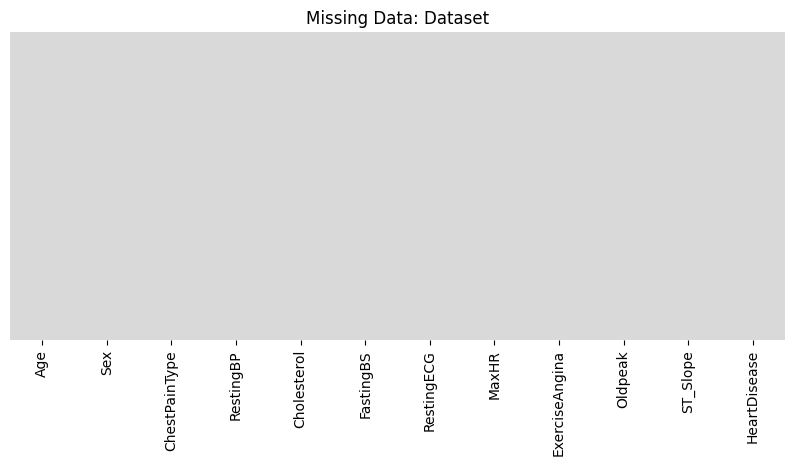

In [70]:
# Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data: Dataset')
plt.show()

**There are no missing values in the data set**

### 2. Check Duplicates 

In [71]:
df.duplicated().sum()

0

**There are no duplicates values in the data set**

### 3 .Check data types

In [72]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 4. Checking the number of unique values of each column

In [74]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### 5. Check statistics of data set

In [75]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Printing Unique Categories for Multiple Columns

In this section, we will print the unique categories present in several columns of the heart attack dataset. This will help us understand the diversity of the data.


In [77]:
print("Unique categories in Heart Attack data:")

# Loop through each specified column to print its unique values
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    # Print the unique categories found in the current colum
    print(f"Categories in column '{column}': {df[column].unique()}")

Unique categories in Heart Attack data:
Categories in column 'Sex': ['M' 'F']
Categories in column 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Categories in column 'RestingECG': ['Normal' 'ST' 'LVH']
Categories in column 'ExerciseAngina': ['N' 'Y']
Categories in column 'ST_Slope': ['Up' 'Flat' 'Down']


### 7. Define Numerical and Categorical Columns

In this section, we will separate the numerical and categorical features of the dataset. This helps us understand which columns contain numeric data and which ones contain categorical data, making it easier to apply the appropriate transformations later.

In [78]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

We have 5 categorical features : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [79]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Calculating the Averages of  Multiple Columns

In this section, we calculate the average values for several numerical columns in the heart disease dataset, including **Age**, **RestingBP**, **Cholesterol**, **FastingBS**, **MaxHR**, **Oldpeak**, and **HeartDisease**.


In [80]:
 #Calculate the averages for multiple columns
average_values = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].mean()

# Print the results with column names
print("Averages of the dataset columns:")
for column, value in average_values.items():
    print(f"Average {column}: {value}")


Averages of the dataset columns:
Average Age: 53.510893246187365
Average RestingBP: 132.39651416122004
Average Cholesterol: 198.7995642701525
Average FastingBS: 0.23311546840958605
Average MaxHR: 136.80936819172112
Average Oldpeak: 0.8873638344226579
Average HeartDisease: 0.5533769063180828


## Visualizing the Distribution of Numerical Columns

We will visualize the following columns from the dataset:
- **Age**
- **RestingBP (Resting Blood Pressure)**
- **Cholesterol**
- **MaxHR (Maximum Heart Rate)**
- **Oldpeak (ST depression induced by exercise)**

For each column, we will create histograms along with KDE to better understand the distribution of these numerical variables.

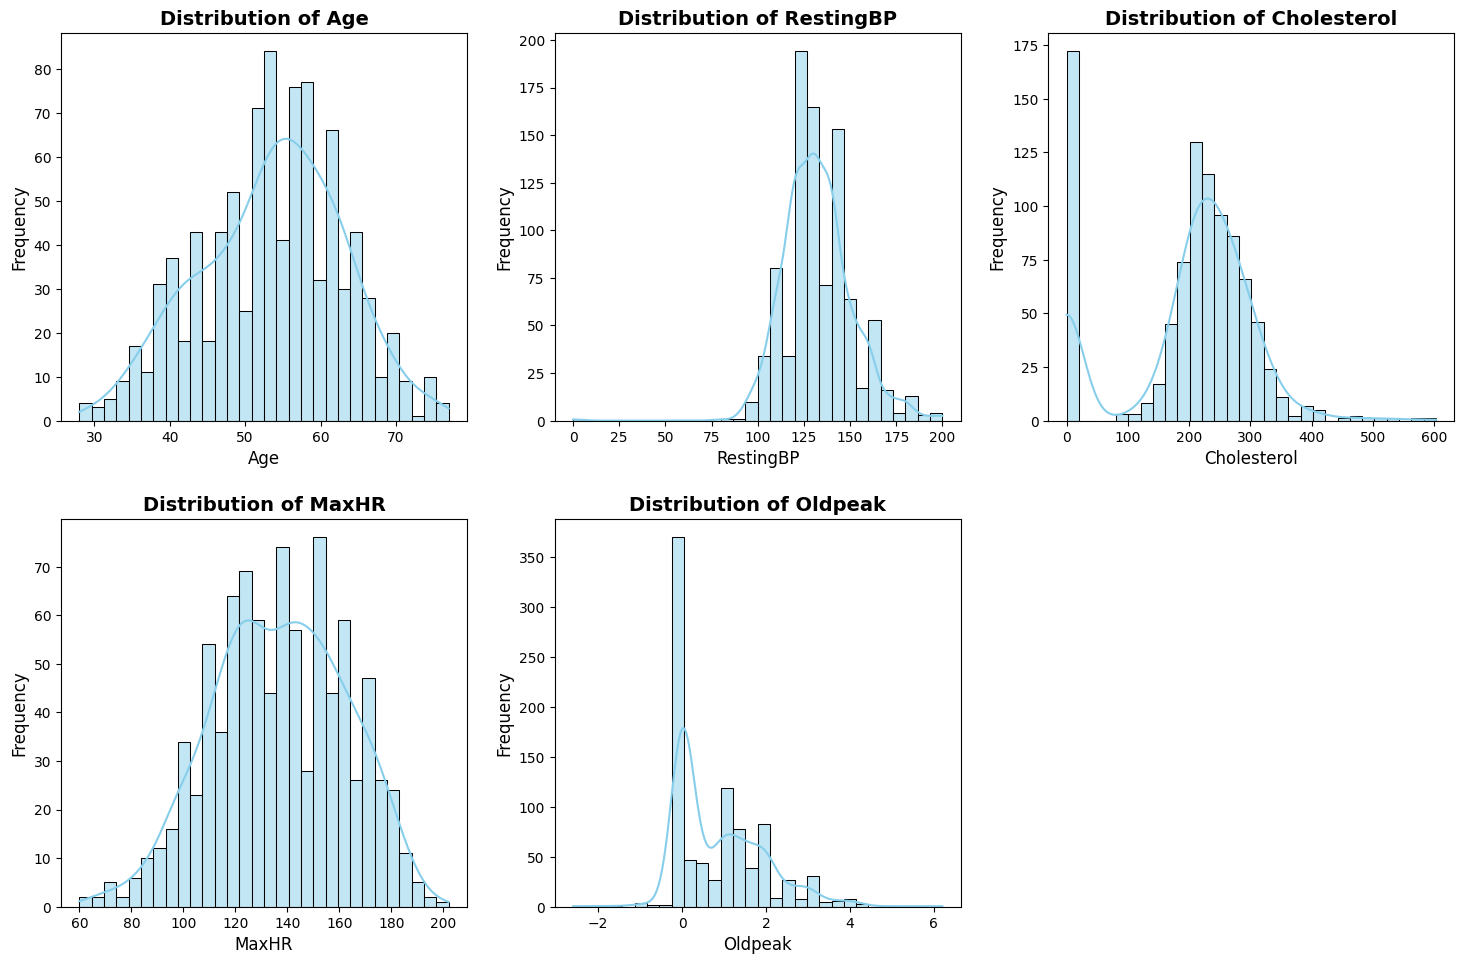

In [112]:
# List of columns to visualize
columns_to_visualize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Set up the figure size for subplots
plt.figure(figsize=(15, 10))

# Loop through each column and plot its distribution with a histogram and KDE
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black', bins=30)  # Histogram with KDE
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')  # Title for each subplot
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)  # Adjust padding between subplots
plt.show()


### Visualizing the Distribution of Categorical Columns

We will visualize the following categorical columns from the dataset:
- **Sex**
- **ChestPainType**
- **RestingECG**
- **ExerciseAngina**
- **ST_Slope**
- **HeartDisease**

For each column, we will create count plots to show the number of occurrences of each category.


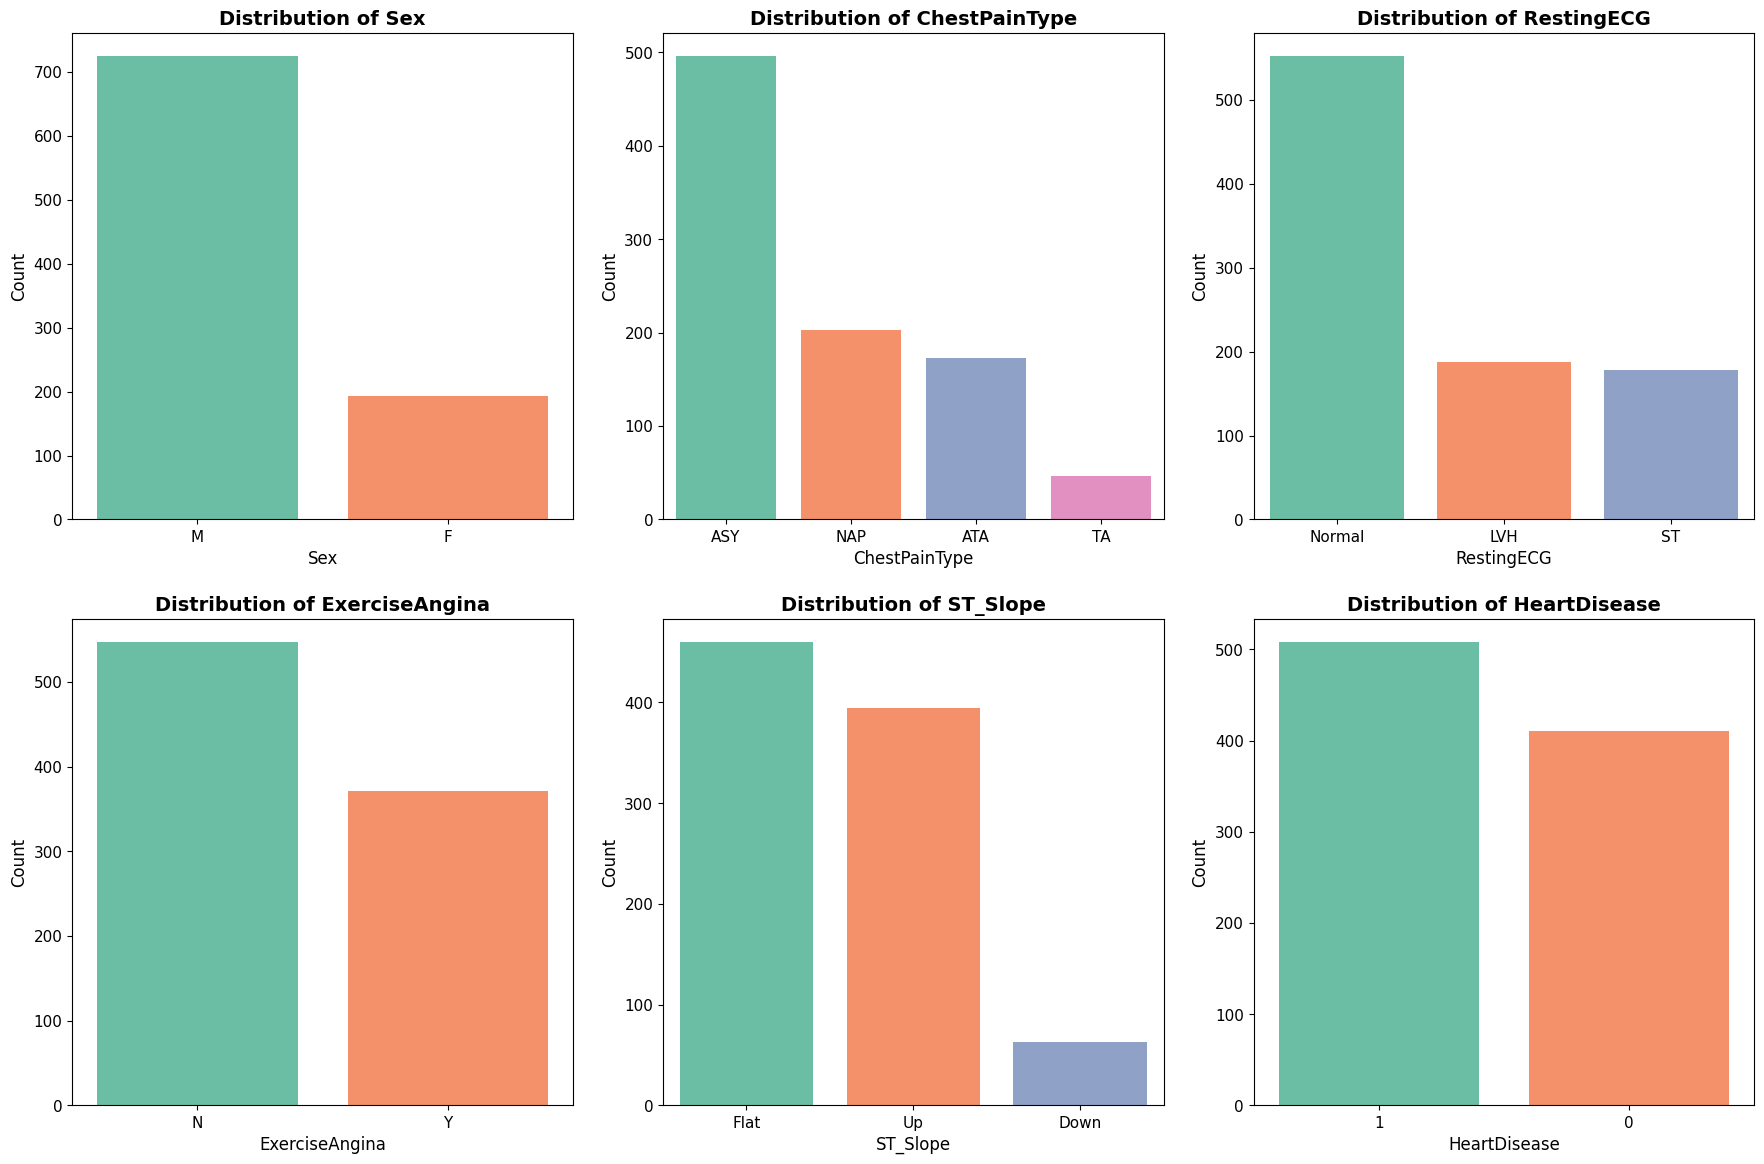

In [110]:
# List of categorical columns to visualize
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Set up the figure for subplots
plt.figure(figsize=(18, 12))  # Slightly larger figure for better visualization

# Loop through each categorical column and plot its distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette='Set2', saturation=0.9)  # Using a color palette for better appearance
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')  # Title for each subplot
    plt.xlabel(column, fontsize=12)  # Label x-axis
    plt.ylabel('Count', fontsize=12)  # Label y-axis
    plt.xticks(fontsize=11)  # Adjust font size for x-axis labels
    plt.yticks(fontsize=11)  # Adjust font size for y-axis labels

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)  # Adjust padding for better spacing between subplots
plt.show()


### Visualizing the Distribution of Numerical Features Using Violin Plots

We will use violin plots to visualize the distribution of **Age**, **Cholesterol**, and **MaxHR** grouped by categorical variables such as **Sex**, **ChestPainType**, and **ExerciseAngina**.

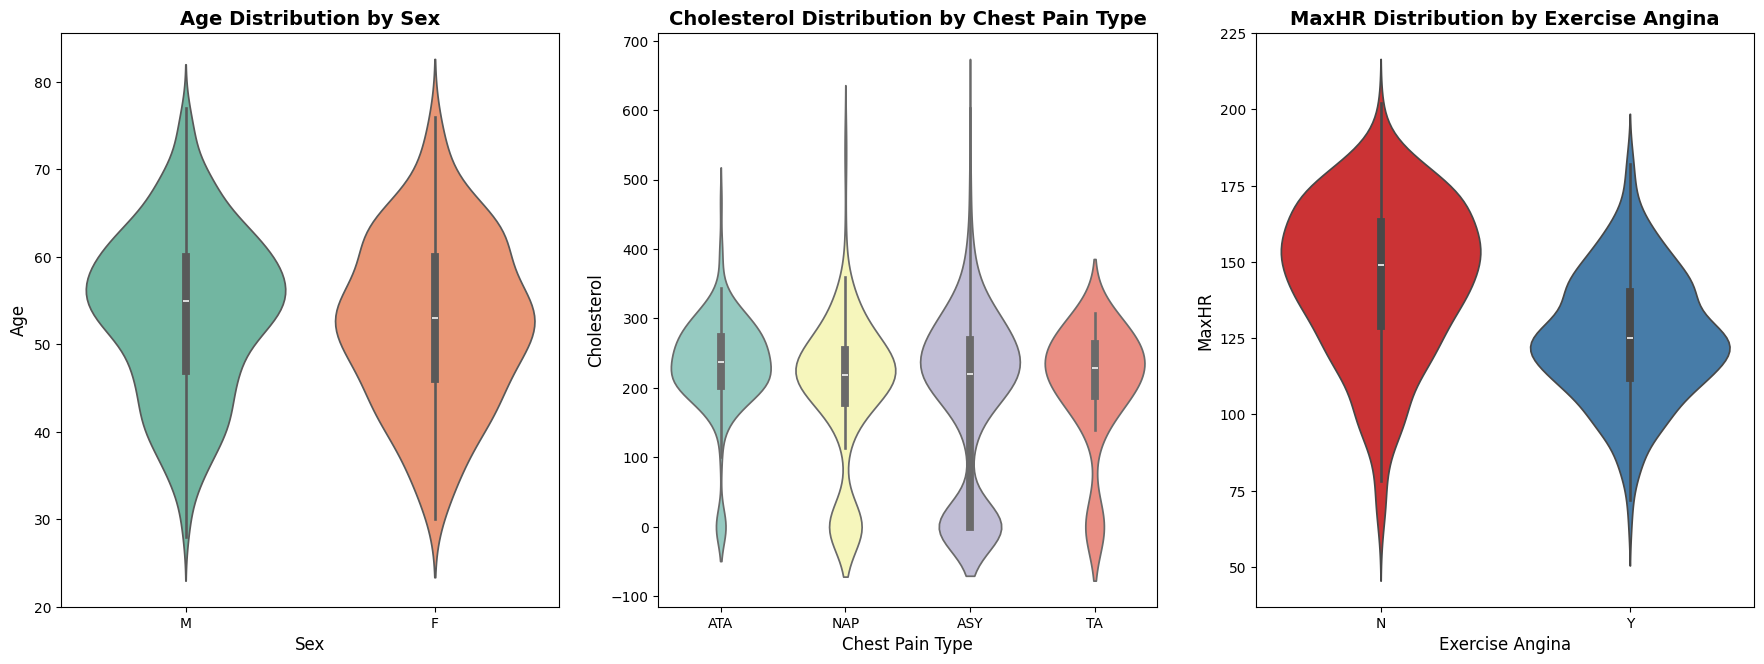

In [111]:
# Set up the figure size for multiple violin plots
plt.figure(figsize=(18, 7))

# Violin Plot for Age by Sex
plt.subplot(131)
sns.violinplot(x='Sex', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Violin Plot for Cholesterol by ChestPainType
plt.subplot(132)
sns.violinplot(x='ChestPainType', y='Cholesterol', data=df, palette='Set3')
plt.title('Cholesterol Distribution by Chest Pain Type', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)

# Violin Plot for MaxHR by ExerciseAngina
plt.subplot(133)
sns.violinplot(x='ExerciseAngina', y='MaxHR', data=df, palette='Set1')
plt.title('MaxHR Distribution by Exercise Angina', fontsize=14, fontweight='bold')
plt.xlabel('Exercise Angina', fontsize=12)
plt.ylabel('MaxHR', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)  # Adjust padding between subplots for better readability
plt.show()


### Visualizing Heart Disease Data

We will create two visualizations for a categorical variable (e.g., **HeartDisease**):
1. A **count plot** to show the number of occurrences of each category related to heart disease.
2. A **pie chart** to represent the proportion of each category visually.

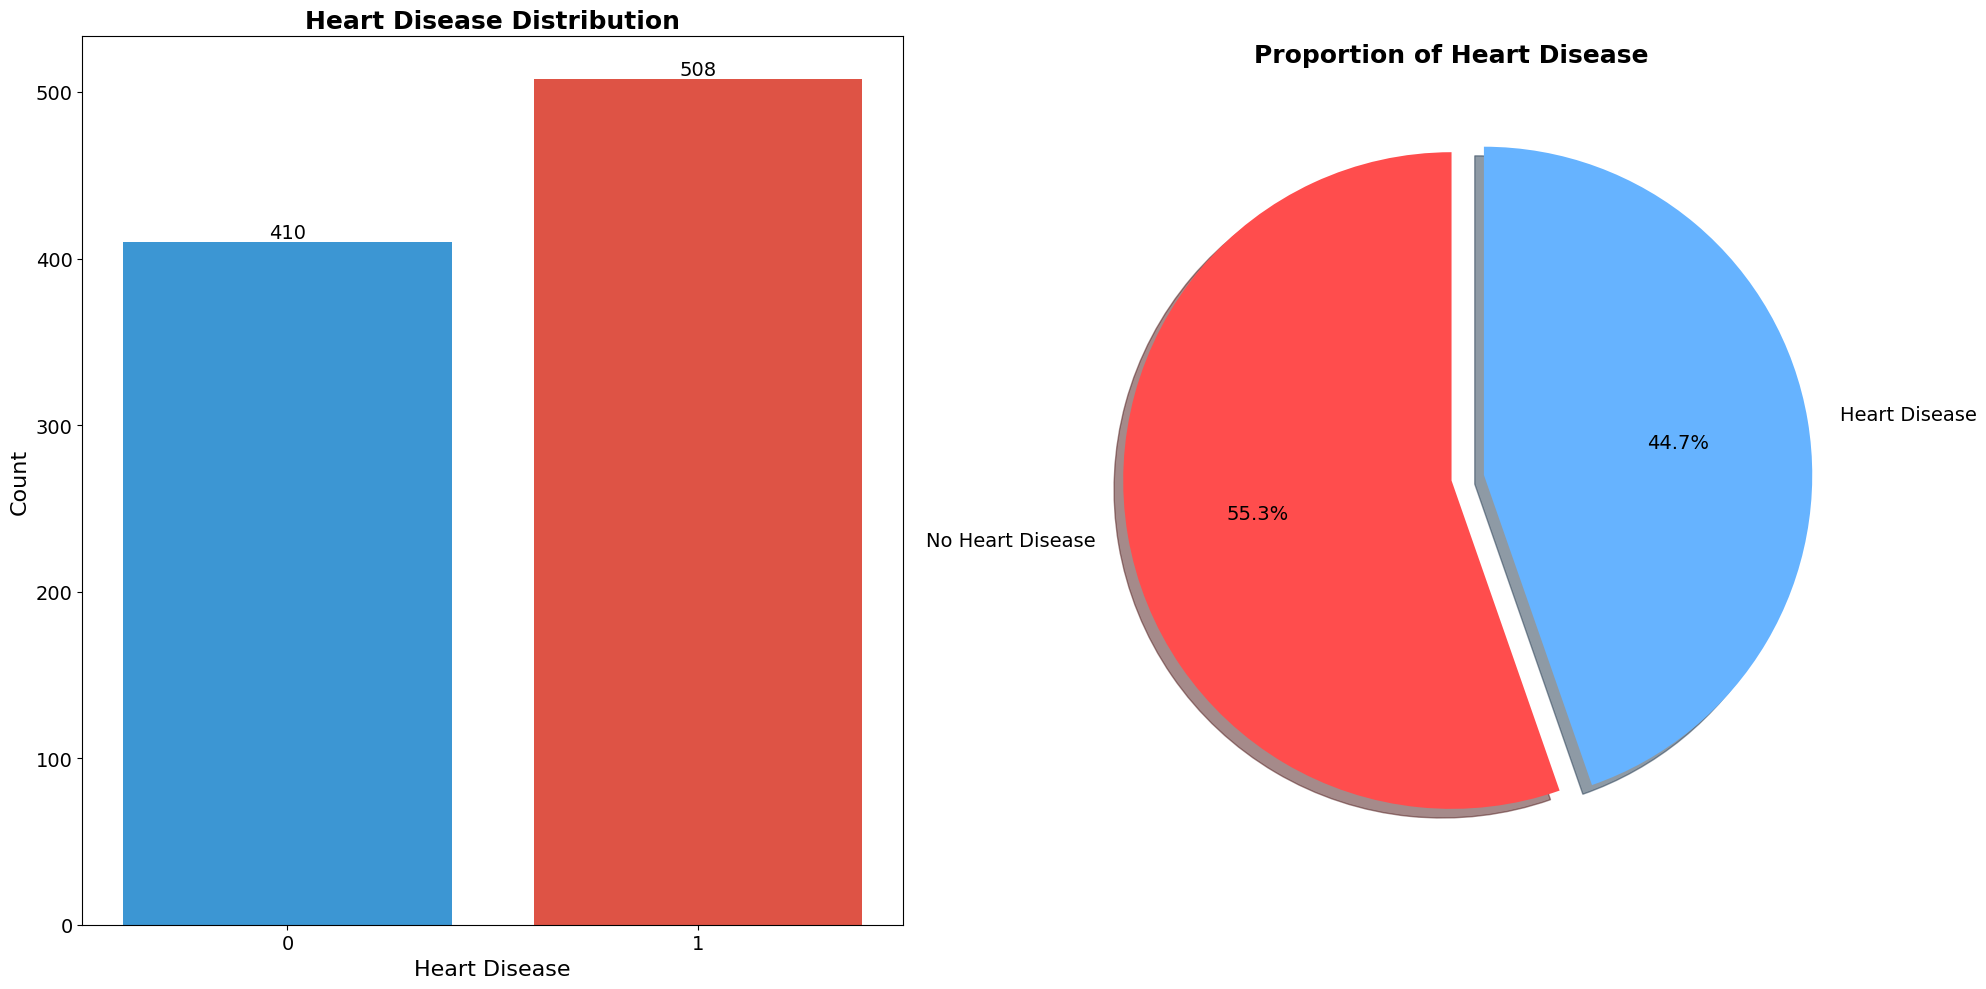

In [109]:
# Creating a subplot for heart disease condition visualization
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'HeartDisease' variable
sns.countplot(x=df['HeartDisease'], data=df, palette=['#3498db', '#e74c3c'], ax=ax[0], saturation=0.9)  # Updated colors
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Heart Disease Distribution', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('Heart Disease', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'HeartDisease' variable
plt.subplot(122)
plt.pie(x=df['HeartDisease'].value_counts(), 
        labels=['No Heart Disease', 'Heart Disease'], 
        explode=[0, 0.1],  # Highlight the heart disease category
        autopct='%1.1f%%', 
        shadow=True, 
        colors=['#ff4d4d', '#66b3ff'],  # Different colors for categories
        startangle=90, textprops={'fontsize': 14})  # Start angle and text properties
plt.title('Proportion of Heart Disease', fontsize=18, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()


### Visualizing Heart Disease Condition and Gender Distribution

In this section, we will visualize the distribution of gender and the relationship between sex and heart disease using a count plot and a pie chart.

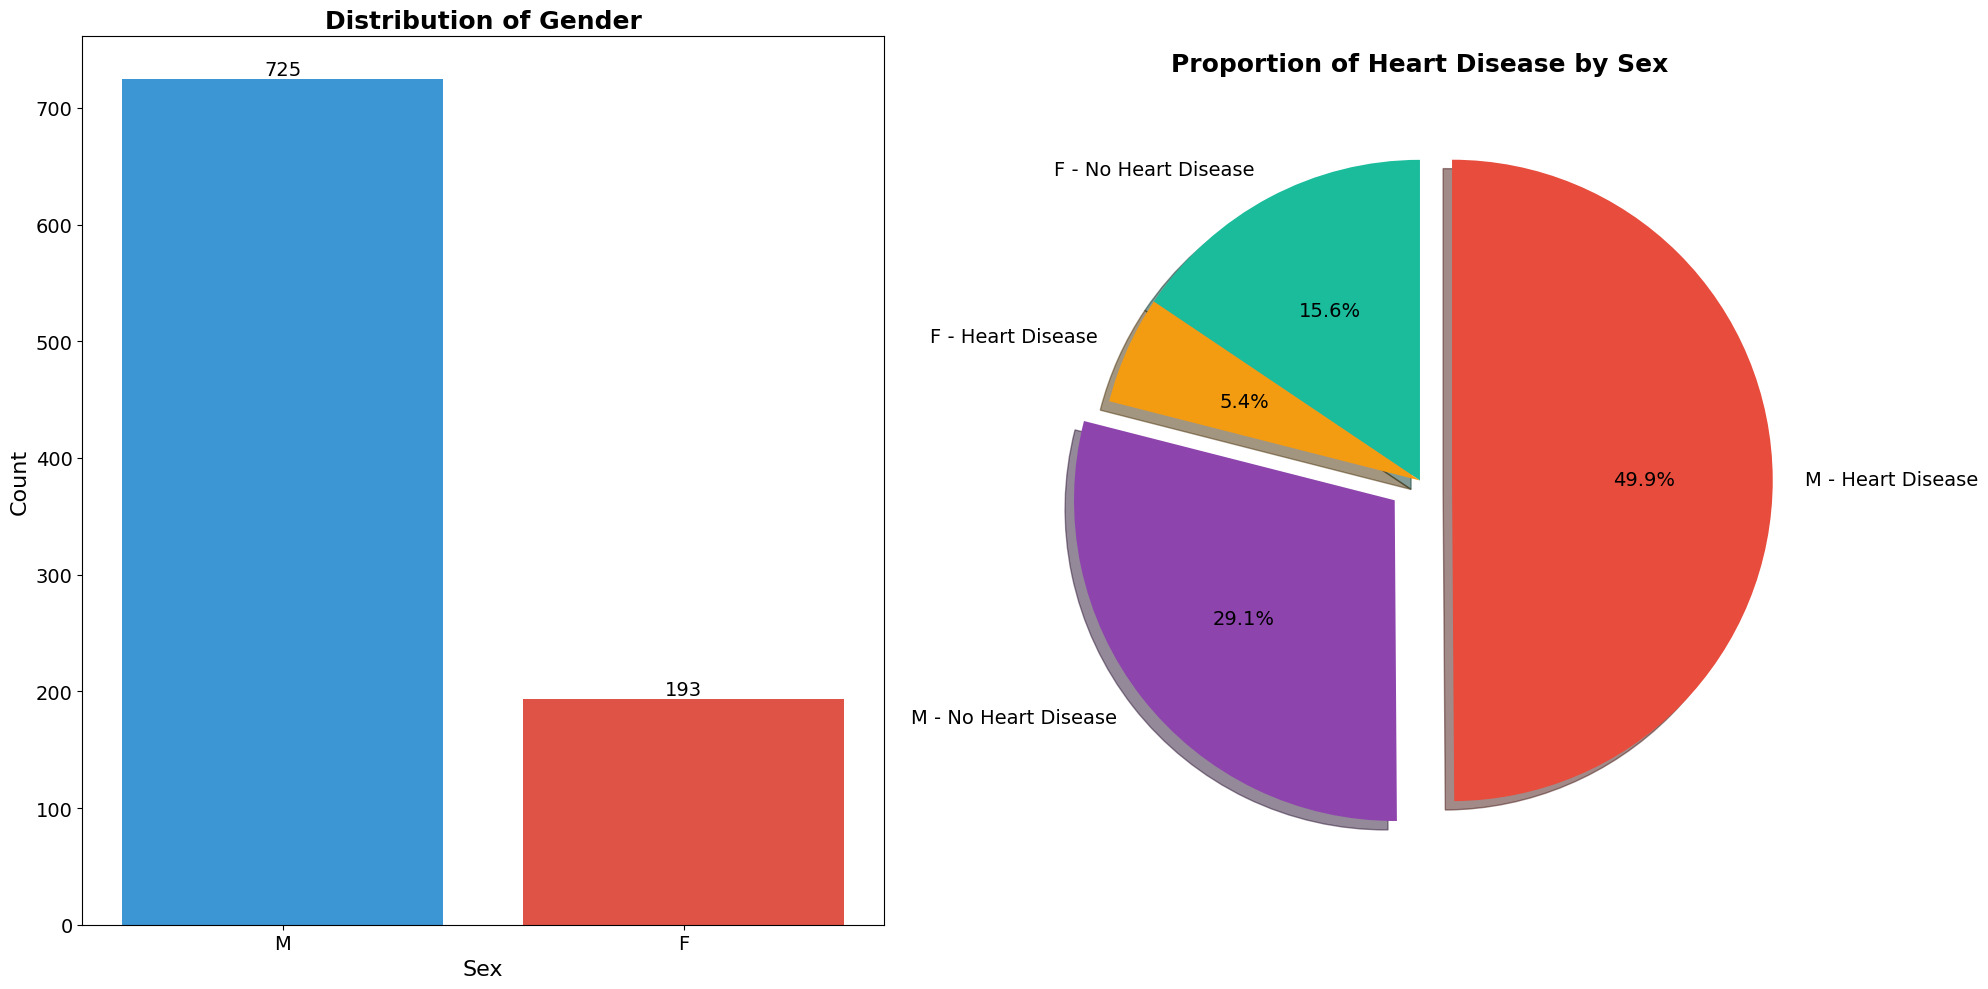

In [108]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'Sex' variable
sns.countplot(x=df['Sex'], data=df, palette=['#3498db', '#e74c3c'], ax=ax[0], saturation=0.9)  # Updated colors
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Distribution of Gender', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('Sex', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'HeartDisease' variable segmented by 'Sex'
heart_disease_counts = df.groupby('Sex')['HeartDisease'].value_counts().unstack()
ax[1].pie(heart_disease_counts.values.flatten(), 
          labels=[f'{sex} - {"Heart Disease" if hd else "No Heart Disease"}' for sex in heart_disease_counts.index for hd in heart_disease_counts.columns],
          explode=[0.1 if hd else 0 for hd in heart_disease_counts.columns for _ in heart_disease_counts.index],  # Highlight heart disease segments
          autopct='%1.1f%%', 
          shadow=True, 
          colors=['#1abc9c', '#f39c12', '#8e44ad', '#e74c3c'],  # Updated, modern color palette
          startangle=90, textprops={'fontsize': 14})  # Start angle and text properties
ax[1].set_title('Proportion of Heart Disease by Sex', fontsize=18, fontweight='bold')  # Title for pie chart

# Display the plots
plt.tight_layout()
plt.show()


# Heart Disease Visualization

This notebook section visualizes the distribution of `ChestPainType` and the proportion of heart disease cases based on chest pain types using subplots.

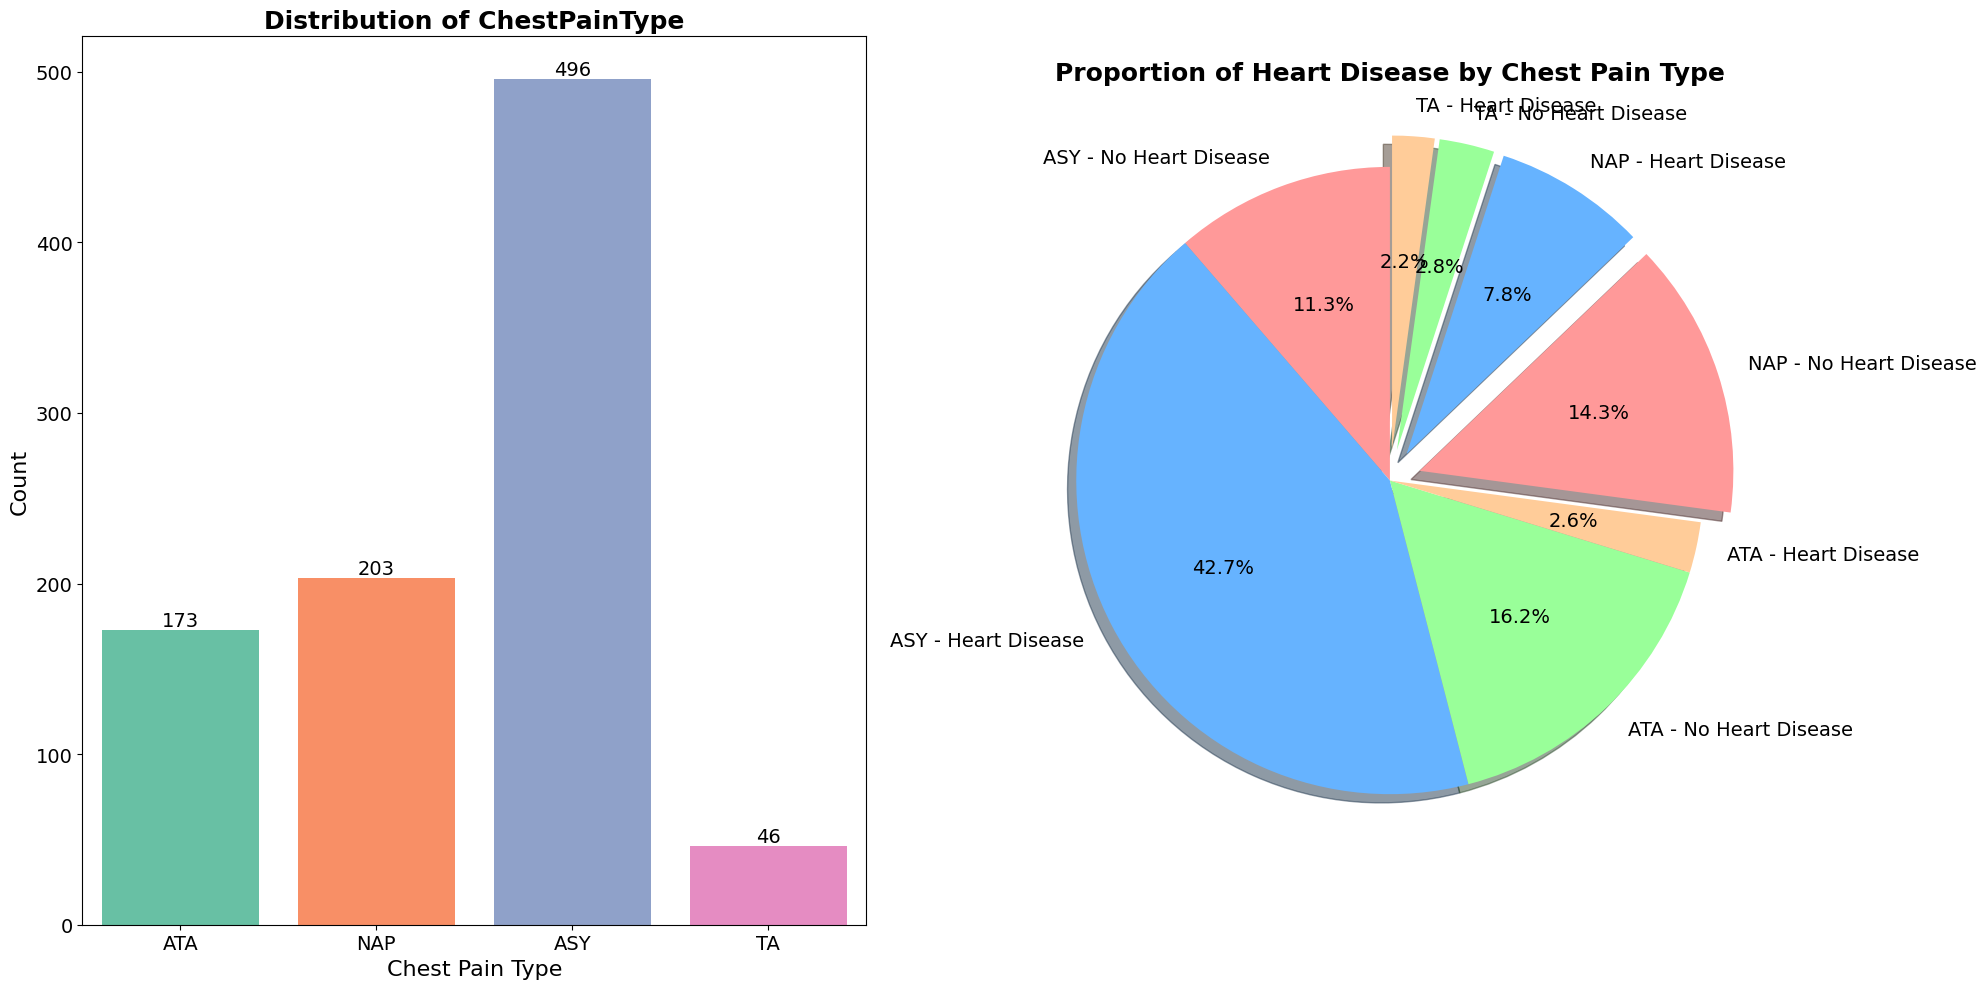

In [107]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'ChestPainType' variable
sns.countplot(x=df['ChestPainType'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Distribution of ChestPainType', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('Chest Pain Type', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'HeartDisease' variable segmented by 'ChestPainType'
heart_disease_counts = df.groupby('ChestPainType')['HeartDisease'].value_counts().unstack()
ax[1].pie(heart_disease_counts.values.flatten(), 
          labels=[f'{ChestPainType} - {"Heart Disease" if hd else "No Heart Disease"}' for ChestPainType in heart_disease_counts.index for hd in heart_disease_counts.columns],
          explode=[0.1 if hd else 0 for hd in heart_disease_counts.columns for _ in heart_disease_counts.index],  # Highlight heart disease segments
          autopct='%1.1f%%', 
          shadow=True, 
          colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Softer, professional color palette
          startangle=90, textprops={'fontsize': 14})  # Starting angle and text properties
ax[1].set_title('Proportion of Heart Disease by Chest Pain Type', fontsize=18, fontweight='bold')  # Title for pie chart

# Display the plots
plt.tight_layout()
plt.show()


# Heart Disease Data Visualization

In this notebook, we will create subplots to visualize the relationship between the `RestingECG` variable and heart disease conditions in the dataset. We'll use a count plot to show the distribution of the `RestingECG` values and a pie chart to represent the proportions of heart disease cases segmented by `RestingECG`.




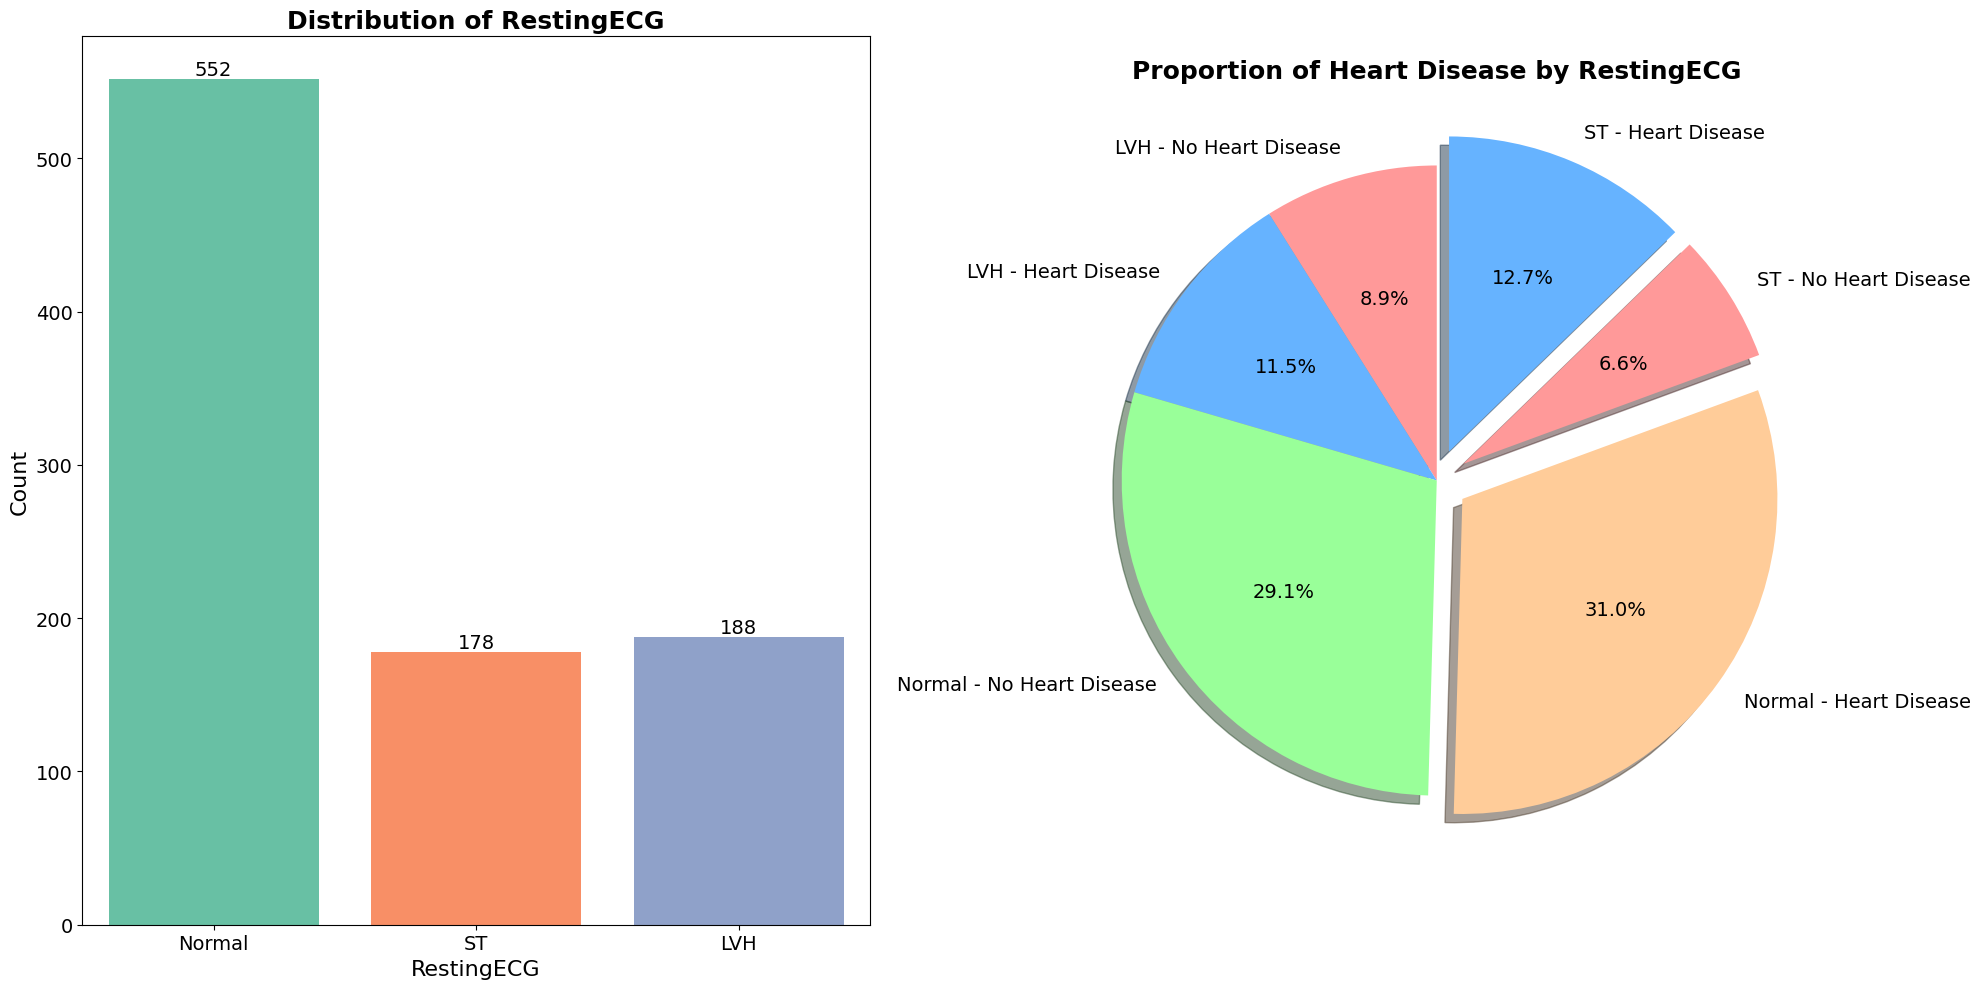

In [118]:
# Create the subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'RestingBP' variable
sns.countplot(x=df['RestingECG'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Distribution of RestingECG', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('RestingECG', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for 'HeartDisease' proportions segmented by 'RestingBP'
heart_disease_counts = df.groupby('RestingECG')['HeartDisease'].value_counts().unstack()

# Flatten values correctly and match with the labels
values = heart_disease_counts.values.flatten()  # Flatten the values for the pie chart
labels = [f'{bp} - {"Heart Disease" if hd else "No Heart Disease"}'
          for bp in heart_disease_counts.index for hd in heart_disease_counts.columns]  # Generating the labels

# Ensure valid pie chart input
ax[1].pie(values, 
          labels=labels,
          explode=[0.1 if hd else 0 for hd in heart_disease_counts.columns for _ in heart_disease_counts.index],  # Highlight heart disease segments
          autopct='%1.1f%%', 
          shadow=True, 
          colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Softer, professional color palette
          startangle=90, textprops={'fontsize': 14})  # Starting angle and text properties

ax[1].set_title('Proportion of Heart Disease by RestingECG', fontsize=18, fontweight='bold')  # Title for pie chart

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Exercise Angina Visualization

This section visualizes the distribution of `ExerciseAngina` and the proportion of heart disease cases based on exercise angina status using subplots.


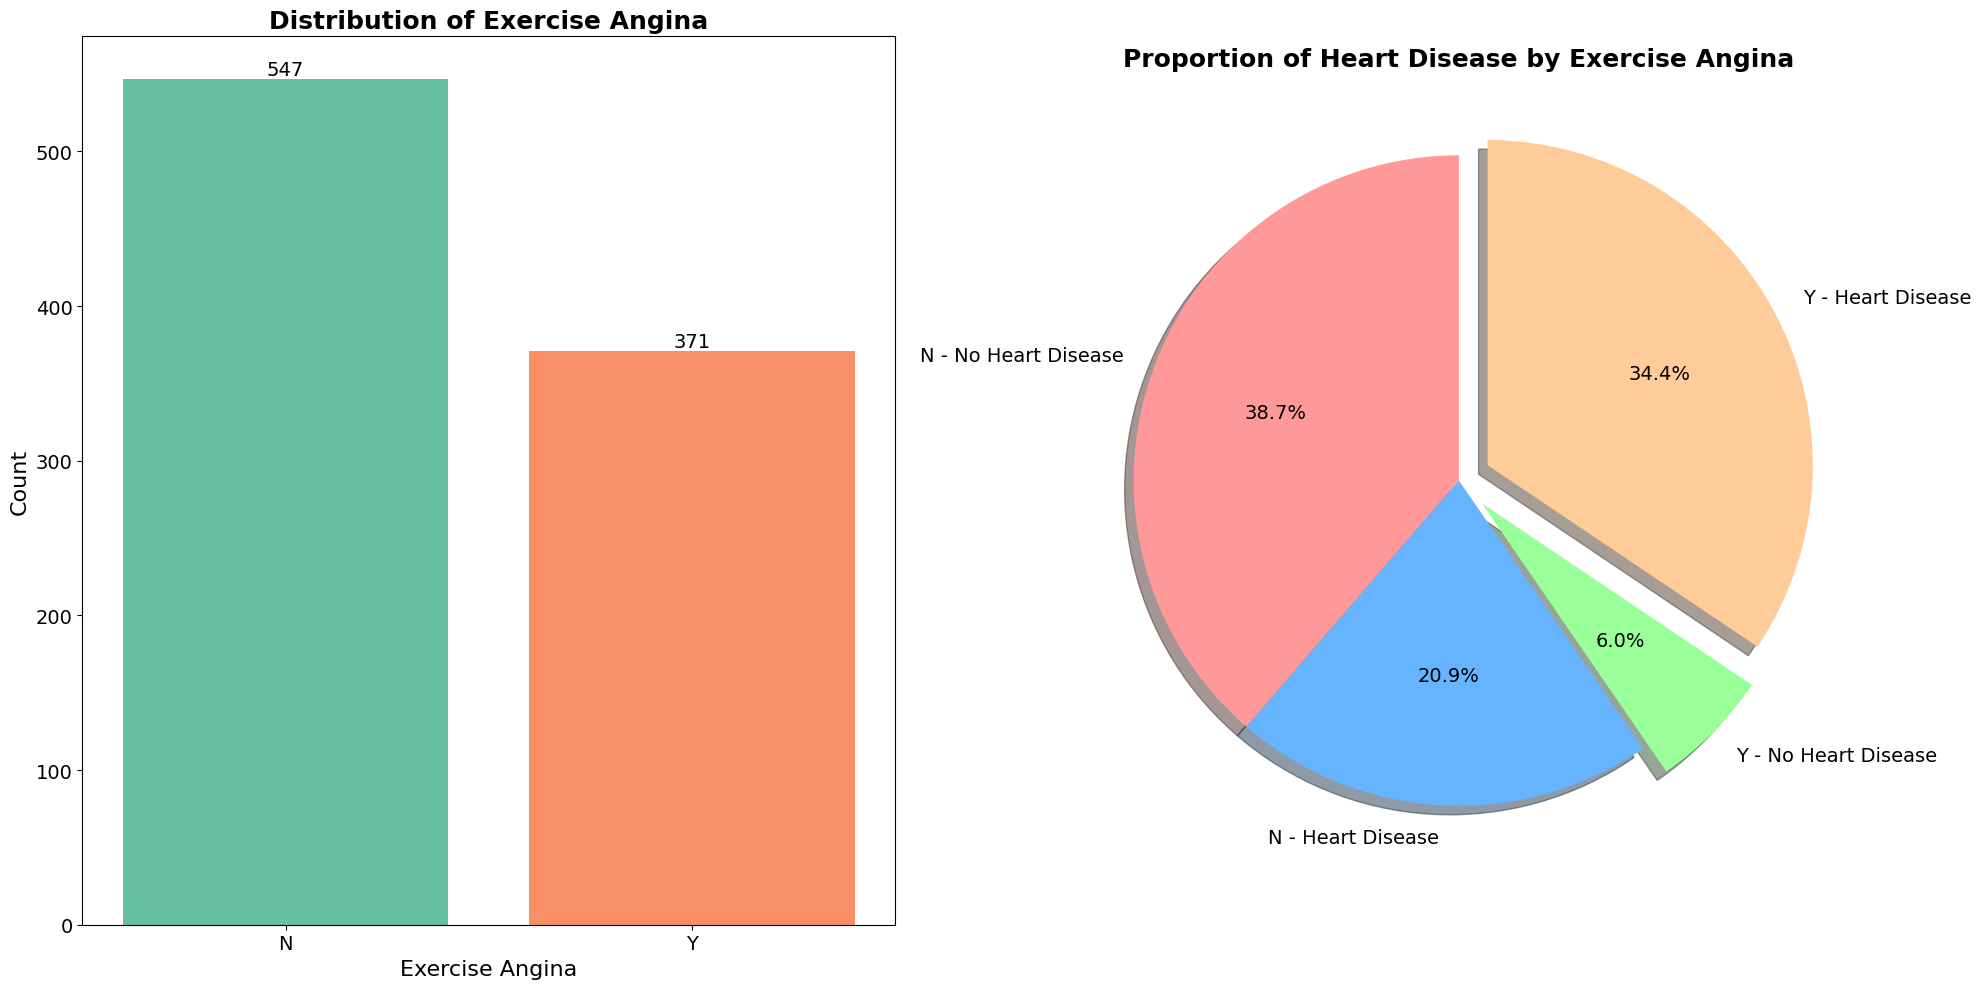

In [120]:
# Create subplots for visualizing Exercise Angina and Heart Disease proportions
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'ExerciseAngina' variable
sns.countplot(x=df['ExerciseAngina'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Distribution of Exercise Angina', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('Exercise Angina', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'HeartDisease' variable segmented by 'ExerciseAngina'
heart_disease_counts = df.groupby('ExerciseAngina')['HeartDisease'].value_counts().unstack()

# Prepare labels for the pie chart
labels = [f'{angina} - {"Heart Disease" if hd else "No Heart Disease"}' 
          for angina in heart_disease_counts.index 
          for hd in heart_disease_counts.columns]

# Flatten values for the pie chart
values = heart_disease_counts.values.flatten()  

# Pie chart
ax[1].pie(values, 
           labels=labels,
           explode=[0.1 if hd else 0 for hd in heart_disease_counts.columns for _ in heart_disease_counts.index],  # Highlight heart disease segments
           autopct='%1.1f%%', 
           shadow=True, 
           colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Softer, professional color palette
           startangle=90, textprops={'fontsize': 14})  # Starting angle and text properties

ax[1].set_title('Proportion of Heart Disease by Exercise Angina', fontsize=18, fontweight='bold')  # Title for pie chart

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Visualization of ST Slope and Heart Disease Proportions

This section creates subplots to visualize the distribution of `ST Slope` and the proportions of heart disease based on `ST Slope`.


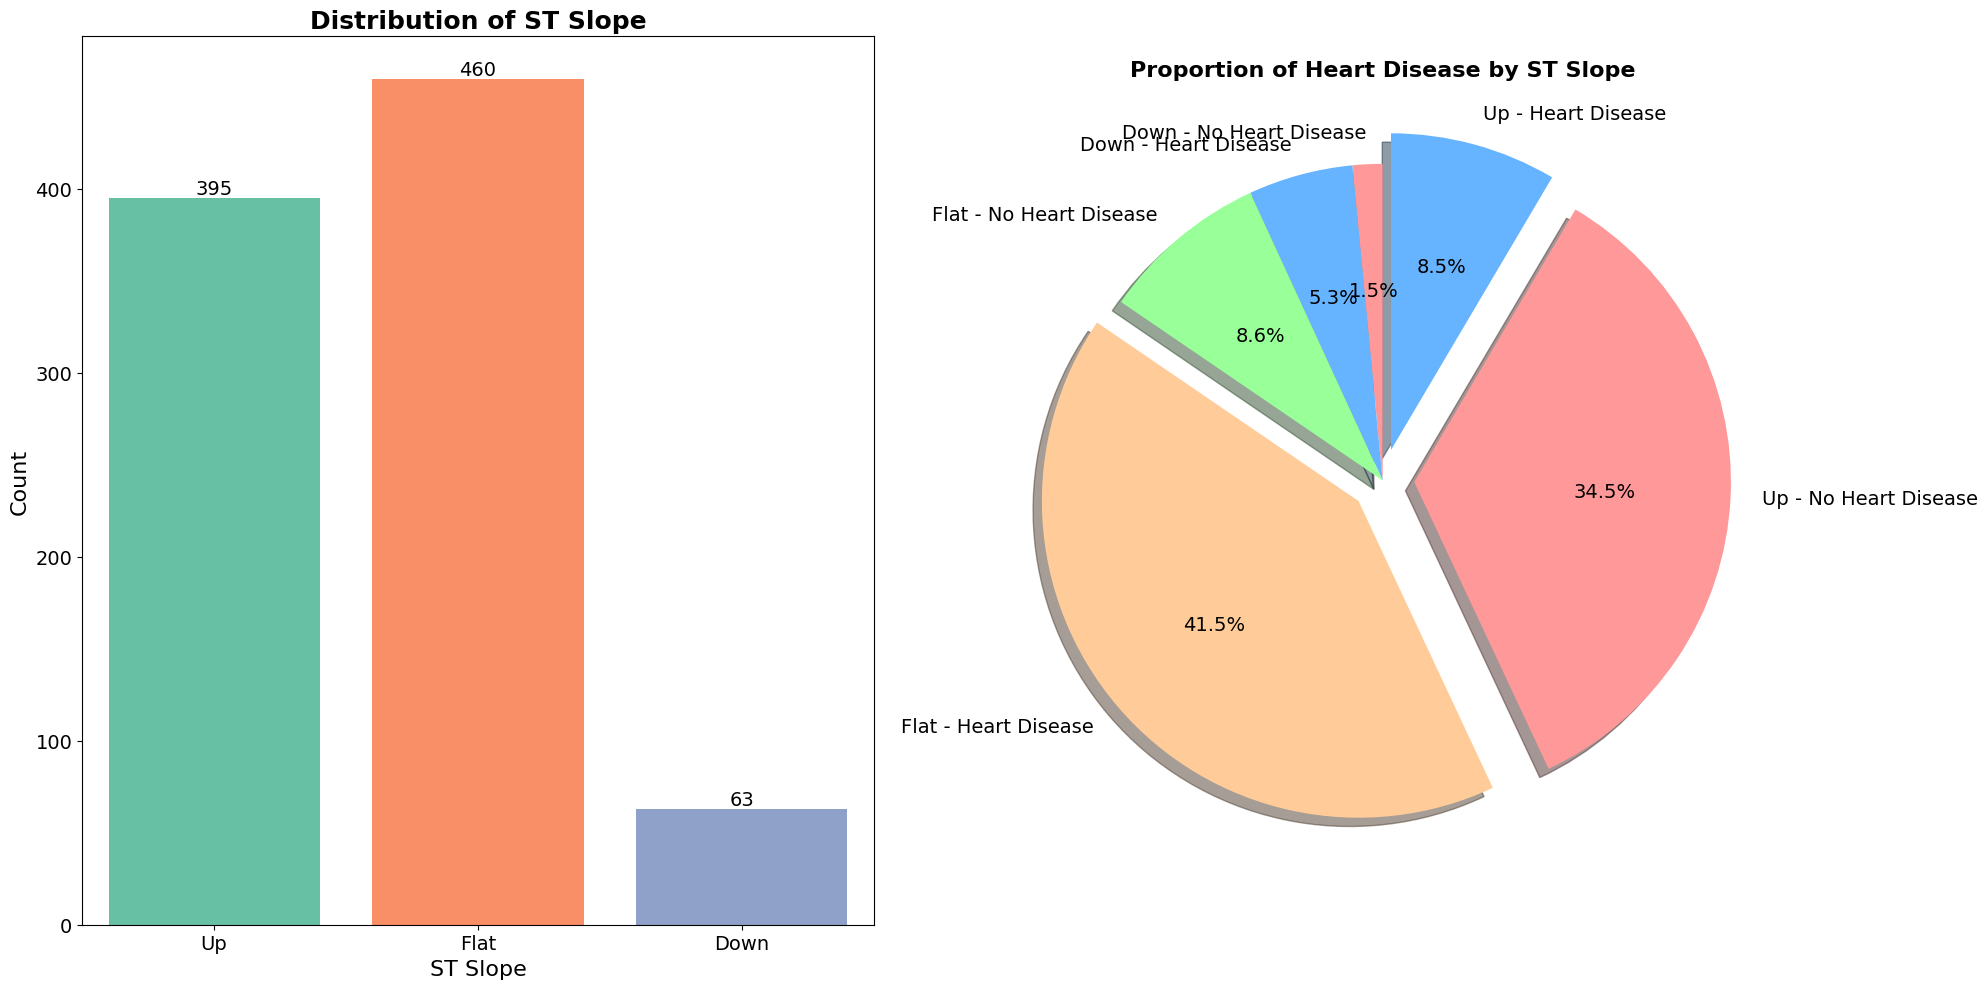

In [124]:
# Create subplots for visualizing ST Slope and Heart Disease proportions
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'ST_Slope' variable
sns.countplot(x=df['ST_Slope'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars

ax[0].set_title('Distribution of ST Slope', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('ST Slope', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'HeartDisease' variable segmented by 'ST Slope'
heart_disease_counts = df.groupby('ST_Slope')['HeartDisease'].value_counts().unstack()

# Prepare labels for the pie chart
labels = [f'{slope} - {"Heart Disease" if hd else "No Heart Disease"}' 
          for slope in heart_disease_counts.index 
          for hd in heart_disease_counts.columns]

# Flatten values for the pie chart
values = heart_disease_counts.values.flatten()  

# Create pie chart
ax[1].pie(values, 
           labels=labels,
           explode=[0.1 if hd else 0 for hd in heart_disease_counts.columns for _ in heart_disease_counts.index],  # Highlight heart disease segments
           autopct='%1.1f%%', 
           shadow=True, 
           colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Softer, professional color palette
           startangle=90, textprops={'fontsize': 14})  # Starting angle and text properties

ax[1].set_title('Proportion of Heart Disease by ST Slope', fontsize=16, fontweight='bold')  # Title for pie chart

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

df.info()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Grouping the DataFrame by 'HeartDisease' and Calculating the Mean of Numeric Columns

In this section, we group the DataFrame by the **HeartDisease** variable, which is a categorical variable indicating the presence or absence of heart disease. The goal is to calculate the mean of all numeric columns (e.g., temperature, wind speed, precipitation) for each category of heart disease.

The `.mean(numeric_only=True)` method ensures that only numeric columns are included in the calculation of the mean.


In [130]:
# Grouping the DataFrame by 'weather' and calculating the mean of only numeric columns
# 'weather' is the categorical variable representing different weather conditions (e.g., drizzle, rain, sun)
# The .mean(numeric_only=True) ensures that only the numeric columns are included in the calculation of the mean

gender_group = df.groupby('HeartDisease').mean(numeric_only=True)

# Display the result
# The result will show the average values of all numeric columns (e.g., temp, wind, precipitation) for each weather condition.
gender_group


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


## Weather Data Analysis

This section of the analysis focuses on visualizing the relationship between different weather conditions and their corresponding average temperature, wind speed, and precipitation levels.

### Required Libraries

We will use the following libraries for data manipulation and visualization:
- **Pandas**: For data handling and manipulation.
- **Seaborn**: For creating informative statistical graphics.
- **Matplotlib**: For generating plots and charts.


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Visualization of Heart Disease Data

This notebook visualizes various health metrics related to heart disease. We will analyze the average values of the following attributes grouped by `HeartDisease`:

- Age
- Resting Blood Pressure (RestingBP)
- Cholesterol
- Fasting Blood Sugar (FastingBS)
- Maximum Heart Rate (MaxHR)
- Oldpeak (depression induced by exercise relative to rest)



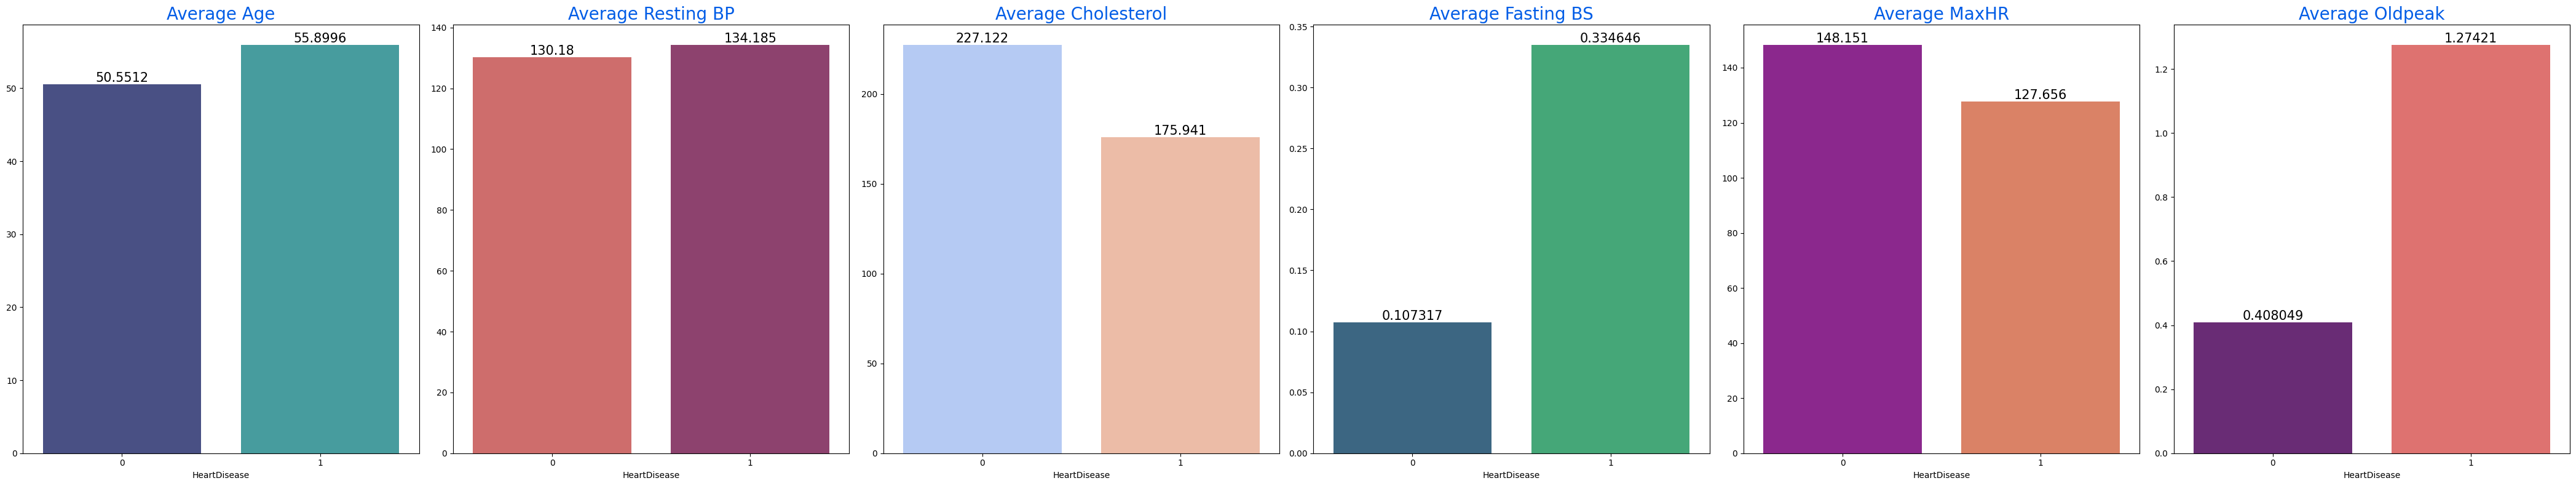

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data
# Group the data by HeartDisease
group_data = df.groupby('HeartDisease')

# Set up subplots for Age, Resting Blood Pressure, Cholesterol, Fasting Blood Sugar, MaxHR, and Oldpeak
fig, ax = plt.subplots(1, 6, figsize=(42, 8))  # Create a figure with 1 row and 6 columns of subplots

# Average Age plot
sns.barplot(
    x=group_data['Age'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['Age'].mean().values,  # Y-axis: Average age for each category
    palette='mako',  # Color palette for the bars
    ax=ax[0]  # Assign to the first subplot
)
ax[0].set_title('Average Age', color='#005ce6', size=20)  # Set title for the Age plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Average Resting Blood Pressure plot
sns.barplot(
    x=group_data['RestingBP'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['RestingBP'].mean().values,  # Y-axis: Average RestingBP for each category
    palette='flare',  # Color palette for the bars
    ax=ax[1]  # Assign to the second subplot
)
ax[1].set_title('Average Resting BP', color='#005ce6', size=20)  # Set title for the Resting BP plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Average Cholesterol plot
sns.barplot(
    x=group_data['Cholesterol'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['Cholesterol'].mean().values,  # Y-axis: Average Cholesterol for each category
    palette='coolwarm',  # Color palette for the bars
    ax=ax[2]  # Assign to the third subplot
)
ax[2].set_title('Average Cholesterol', color='#005ce6', size=20)  # Set title for the Cholesterol plot
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Average Fasting Blood Sugar plot
sns.barplot(
    x=group_data['FastingBS'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['FastingBS'].mean().values,  # Y-axis: Average FastingBS for each category
    palette='viridis',  # Color palette for the bars
    ax=ax[3]  # Assign to the fourth subplot
)
ax[3].set_title('Average Fasting BS', color='#005ce6', size=20)  # Set title for the Fasting BS plot
for container in ax[3].containers:
    ax[3].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Average MaxHR plot
sns.barplot(
    x=group_data['MaxHR'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['MaxHR'].mean().values,  # Y-axis: Average MaxHR for each category
    palette='plasma',  # Color palette for the bars
    ax=ax[4]  # Assign to the fifth subplot
)
ax[4].set_title('Average MaxHR', color='#005ce6', size=20)  # Set title for the MaxHR plot
for container in ax[4].containers:
    ax[4].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Average Oldpeak plot
sns.barplot(
    x=group_data['Oldpeak'].mean().index,  # X-axis: Heart Disease categories
    y=group_data['Oldpeak'].mean().values,  # Y-axis: Average Oldpeak for each category
    palette='magma',  # Color palette for the bars
    ax=ax[5]  # Assign to the sixth subplot
)
ax[5].set_title('Average Oldpeak', color='#005ce6', size=20)  # Set title for the Oldpeak plot
for container in ax[5].containers:
    ax[5].bar_label(container, color='black', size=15)  # Annotate bars with their values

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


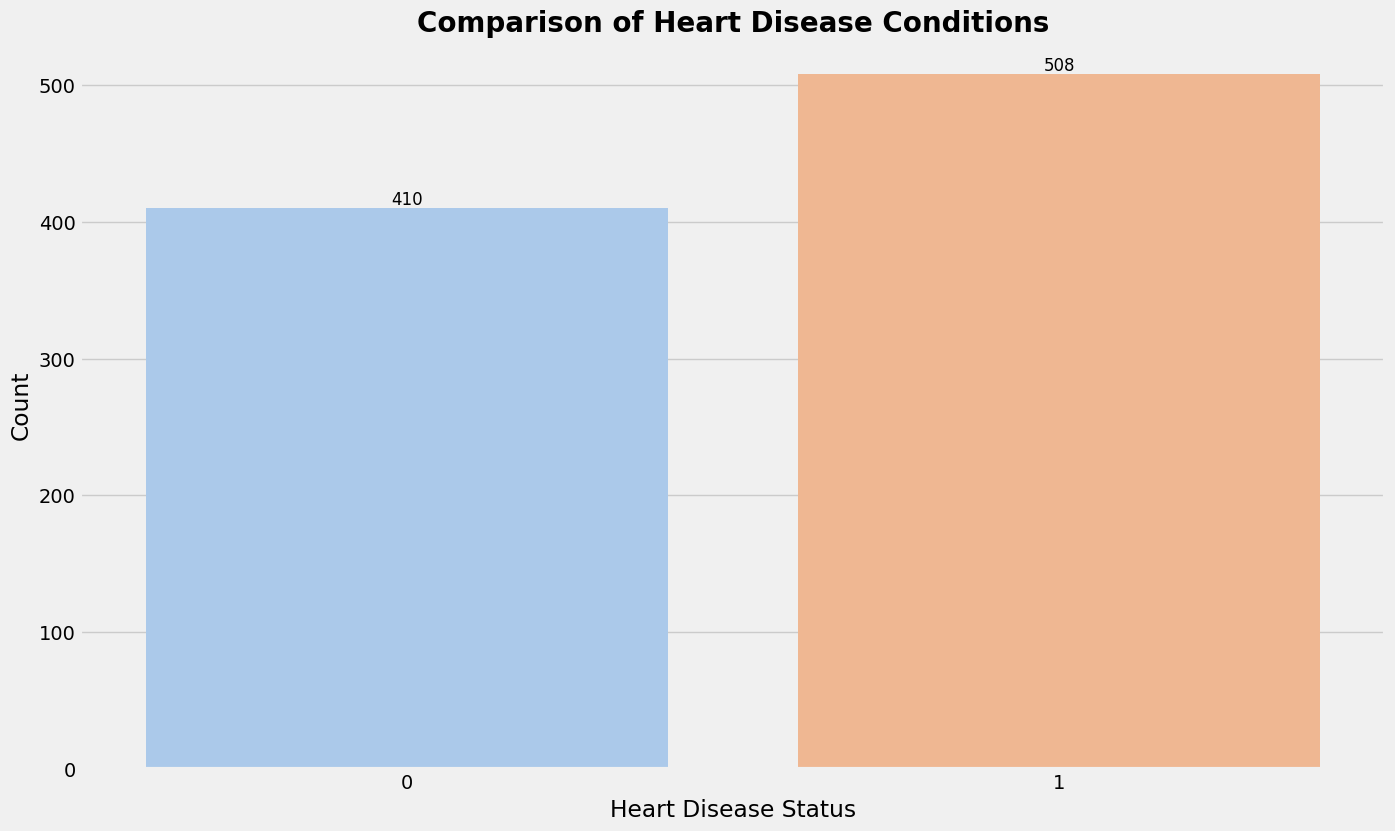

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style for the plot
plt.rcParams['figure.figsize'] = (15, 9)  # Set the default figure size for all plots
plt.style.use('fivethirtyeight')  # Use the 'fivethirtyeight' style for a clean look

# Create a countplot for the 'HeartDisease' variable to visualize its distribution
ax = sns.countplot(x='HeartDisease', data=df, palette='pastel')  # Count occurrences of each heart disease condition

# Set the title and labels for the plot
plt.title('Comparison of Heart Disease Conditions', fontweight='bold', fontsize=20)  # Title with bold font
plt.xlabel('Heart Disease Status')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', color='black', fontsize=12)  # Annotate bars with their values

# Display the plot
plt.show()  # Show the plot
